### 1. 머신러닝
#### 1-1. EDA + 시각화
#### 1-2. 이상치를 식별하고 처리하시오
#### 1-3. 앞선 두 단계에서 발견한 점을 바탕으로 향후 분석시에 고려해야 할 사항을 작성하시오

#### 1-4. 업 샘플링 과정을 설명하고 결과를 작성하시오.
#### 1-5. 언더 샘플링 과정을 설명하고 결과를 작성하시오.
#### 1-6. 둘 중 하나를 선택하고 선택한 이유를 서술하시오.

#### 1-7. 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.
#### 1-8. 모델을 비교하고 결과를 설명하시오.
#### 1-9. 속도 개선을 위한 차원축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오

In [2]:
import pandas as pd
df = pd.read_csv('data/diabetes.csv')
df

'''
Pregnancies(임신횟수) : Number of times pregnant
Glucose(포도당) : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure(혈압) : Diastolic blood pressure (mm Hg)
SkinThickness(피부두께) : Triceps skin fold thickness (mm)
Insulin : 2-Hour serum insulin (mu U/ml)
BMI : Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction(당뇨병혈통함수) : Diabetes pedigree function
Age : Age (years)
Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0
'''

'\nPregnancies(임신횟수) : Number of times pregnant\nGlucose(포도당) : Plasma glucose concentration a 2 hours in an oral glucose tolerance test\nBloodPressure(혈압) : Diastolic blood pressure (mm Hg)\nSkinThickness(피부두께) : Triceps skin fold thickness (mm)\nInsulin : 2-Hour serum insulin (mu U/ml)\nBMI : Body mass index (weight in kg/(height in m)^2)\nDiabetesPedigreeFunction(당뇨병혈통함수) : Diabetes pedigree function\nAge : Age (years)\nOutcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0\n'

In [12]:
from pandas_profiling import ProfileReport
ProfileReport(df, 
              missing_diagrams=None, 
              interactions=None,
              correlations={"pearson": {"calculate": True, "threshold": 0.8},
                            "spearman": {"calculate": False},
                            "kendall": {"calculate": False},
                            "phi_k": {"calculate": False},
                            "cramers": {"calculate": False}},
              explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

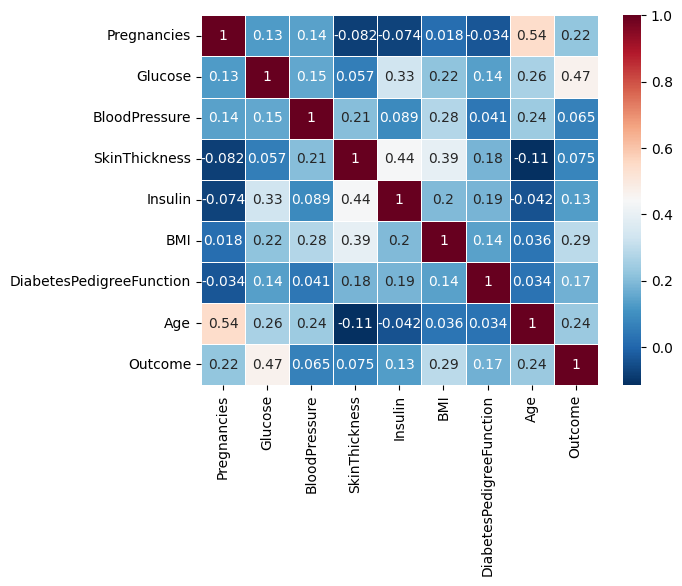

In [6]:
# 1-1. EDA + 시각화
# 1) Outcome 제외한 나머지 변수가 예상 독립변수이며, 모두 연속형변수이다. Outcome은 당뇨병 여부를 나타내는 변수로 범주형변수이다.
# 2) 독립변수 간 상관관계, 독립변수와 종속변수 간 상관관계
df_corr = df.corr(method = 'pearson')
import seaborn as sns
sns.heatmap(df_corr
            , xticklabels = df_corr.columns
            , yticklabels = df_corr.columns
            , cmap = 'RdBu_r'
            , annot = True
            , linewidths = 0.5)

# pearson 상관관계를 보면 상관관계가 0.8이상인 독립변수 간 다중공선성을 보이지 않는다.
# 더불어, 독립변수와 종속변수간의 상관관계가 매우 높은 관계는 보이지 않는다.

In [9]:
# 3) 결측치
df.isnull().sum()
# 결측치가 존재하지 않는다.
# 4) 적용가능한 모델 : 종속변수가 범주형이므로 분류 알고리즘에 적합하다.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

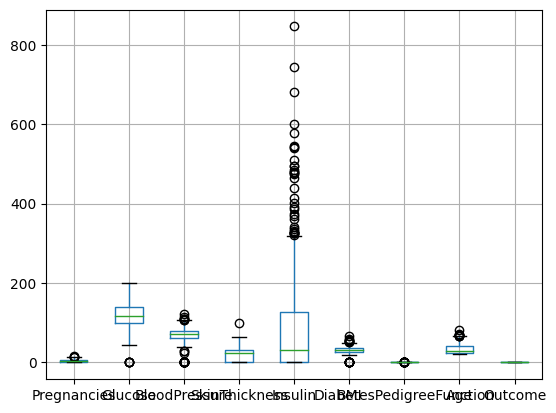

In [11]:
# 1-2. 이상치를 식별하고 처리하시오
df.boxplot()
# 1-3. 앞선 두 단계에서 발견한 점을 바탕으로 향후 분석시에 고려해야 할 사항을 작성하시오